https://www.kaggle.com/c/cisc-873-dm-f22-a4/overview

# **Problem Formulation**

**Problem:** We want to predict apartment/house listing price if it is categorised into one of three categories according to listing characteristics, some features, the appropriate model.

**Inputs:** Two columns(summary and image)

**Output:** Classify an apartment or house into the beginner, plus, or premium category.

**Function required:** Classification & Prediction

**Challenges:** \
1. Remove stopwords, html tags, single letter, and multiple space.
2. Image preprocessing
3. Determine siutable Classifier.
4. Use validation
5. Select optimal hyperparameters.
6. Find best accuracy.

**What is the impact?**
* If the model predicts the type of apartment correctly, this means they will not wait to know if the apartment is beginner, plus, or premium category, as the model will tell them the type of apartment, so they can save time waiting to know if the apartment  is beginner, plus, or premium category.

**What is the ideal solution?**
* The **Trial 5** is the best solution by using **Average, Dropout, and Conv2d**.
* Accuracy **0.68614** (public) **0.69320** (private) in kaggle


# **Trials**

## **Common Commands** in all models

**What is the experimental protocol used and how was it carried out?** \
1. Read Training and Testing Data 
2. Text Preprocessing 
3. Drop NaN values
4. Image Preprocessing
5. Text Tokenizer
6. Tuning hyperparameters
7. Built model
8. Show plot
* I used the hold out method.

**How did we tune hyper-parameters in the template?**
- I tried to change the number of epochs, batch_size, validation split, and early stopping. 
- I tried to change the layer that is used.
- Try and error

**What is the search space?**
 - Search space is specified by the parameter grid's range of values for each parameter.(Try and Error)

**what is the criteria to determine good/bad hyper-parameters?**

 - I define if hyper parameters are good or bad by loss function and performance metric, if the performance improves, that means the hyperparameters are good. If the performance is poor, it means the hyperparameters are bad.


**What preprocessing steps are used?**
* Text preprocessing
  1. Remove html tags.
  2. Remove stopwords.
  3. Remove single letter.
  4. Remove multiple spaces.
  5. Convert all letters to lower case.
  6. Taking any text that's length is greater than 25
  7. Drop NaN values
  8. Text Tokenizer
* Image preprocessing
  1. Read the image as a grey scale.
  2. Resize all images to the same size
  3. Convert image to an array

##### Import liberaries

In [ ]:
#import liberaries that I will use in my code
import os
import math
import pandas as pd
from tqdm.notebook import tqdm
from PIL import Image
import numpy as np
from ast import literal_eval
import re
import pickle
import sklearn
import holoviews as hv # HoloViews is an open-source Python library designed to make data analysis and visualization seamless and simple. 
import nltk # NLTK is a standard Python package with prebuilt functions and utilities for quick and easy use.

In [ ]:
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
# preprocess text data
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from pprint import pprint

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
import collections
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D,Bidirectional,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import GRU,LSTM
from keras.regularizers import l2

In [ ]:
#connect to my drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##### Read Training and Testing data

In [ ]:
# Read all our training data by using read_csv, which takes the path of the file with the extension that I want to read.
data_tr = pd.read_csv('/content/drive/MyDrive/Queens_Practical/Data_Mining/compt4/train_xy.csv')
# Based on position, this function returns the first 5 rows of the dataset. It's used to quickly see if our dataset contains the proper kind of data.
data_tr.head(5)

,summary,image,type,price
0,"Spacious, sunny and cozy modern apartment in t...",img_train/0.jpg,Apartment,1
1,Located in one of the most vibrant and accessi...,img_train/1.jpg,Apartment,0
2,Logement coquet et douillet à 10 minutes du ce...,img_train/2.jpg,Apartment,1
3,"Beautiful and spacious (1076 sc ft, / 100 mc) ...",img_train/3.jpg,Apartment,1
4,Très grand appartement ''rustique'' et très ag...,img_train/4.jpg,Apartment,0


In [ ]:
# Read all our testing data by using read_csv, which takes the path of the file with the extension that I want to read.
data_ts = pd.read_csv('/content/drive/MyDrive/Queens_Practical/Data_Mining/compt4/test_x.csv')
# Based on position, this function returns the first 5 rows of the dataset. It's used to quickly see if our dataset contains the proper kind of data.
data_ts.head(5)

,id,summary,image
0,0,Charming warm house is ready to host you here ...,img_test/0.jpg
1,1,"La chambre est spacieuse et lumineuse, dans un...",img_test/1.jpg
2,2,Grande chambre confortable située au sous-sol ...,img_test/2.jpg
3,3,"Près d’un Métro, ligne orange. 10 minutes à pi...",img_test/3.jpg
4,4,Very bright appartment and very cosy. 2 separa...,img_test/4.jpg


In [ ]:
# Display the column's name in training and testing data
print(data_tr.columns)
print(data_ts.columns)

Index(['summary', 'image', 'type', 'price'], dtype='object')
Index(['id', 'summary', 'image'], dtype='object')


##### Preprocessing

In [ ]:
# Convert type into lable encoder
data_tr['type'] = data_tr.type.astype('category').cat.codes
len_type = len(data_tr.type.unique())
len_price=len(data_tr.price.unique())
data_tr

,summary,image,type,price
0,"Spacious, sunny and cozy modern apartment in t...",img_train/0.jpg,1,1
1,Located in one of the most vibrant and accessi...,img_train/1.jpg,1,0
2,Logement coquet et douillet à 10 minutes du ce...,img_train/2.jpg,1,1
3,"Beautiful and spacious (1076 sc ft, / 100 mc) ...",img_train/3.jpg,1,1
4,Très grand appartement ''rustique'' et très ag...,img_train/4.jpg,1,0
...,...,...,...,...
7622,"Un grand logement 4 et 1/2, tout inclut, bien ...",img_train/7626.jpg,1,0
7623,Magnificent condo directly on the river. You w...,img_train/7627.jpg,1,2
7624,This apartment is perfect for anyone visiting ...,img_train/7628.jpg,1,1
7625,"It is a cozy ,clean ,and comfortable apartment...",img_train/7629.jpg,1,0


###### Text Preprocessing

In [ ]:
nltk.download('punkt') # punkt is a tokenizer uses an unsupervised algorithm to divide a text into a list of sentences.
nltk.download('stopwords') # download english stopwords

stemmer = SnowballStemmer("english")   # It is the method used to return the word to its original form
stop_words = set(stopwords.words("english")) # It is the method of producing a stop words

def clean_text(text):
    """ steps:
        - remove any html tags (< /br> often found)
        - Keep only ASCII + European Chars and whitespace, no digits
        - remove single letter chars
        - convert all whitespaces (tabs etc.) to single wspace
        if not for embedding (but e.g. tdf-idf):
        - all lowercase
        - remove stopwords, punctuation and stemm
    """
    # IGNORECASE : is a flag allows for case-insensitive matching of the Regular Expression with the given string
    RE_WSPACE = re.compile(r"\s+", re.IGNORECASE) # Remove any more than one space
    RE_TAGS = re.compile(r"<[^>]+>") # Remove web tags
    RE_ASCII = re.compile(r"[^A-Za-zÀ-ž ]", re.IGNORECASE) # Remove any leter does not english charachter
    RE_SINGLECHAR = re.compile(r"\b[A-Za-zÀ-ž]\b", re.IGNORECASE) # Remove any single character

    text = re.sub(RE_TAGS, " ", text)# Replace any tag with a single space.
    text = re.sub(RE_ASCII, " ", text) # Replace any non english character with a single space.
    text = re.sub(RE_SINGLECHAR, " ", text) # Replace any single character with a single space.
    text = re.sub(RE_WSPACE, " ", text)  # Replace any more than one space with a single space.

    word_tokens = word_tokenize(text) # split the sentence into words
    words_tokens_lower = [word.lower() for word in word_tokens] # Convert all letters to small letters

    # words_filtered (Words can be filtered based on how many times they appear)
    # stemmer used to return the word to its original form.
    words_filtered = [
        stemmer.stem(word) for word in words_tokens_lower if word not in stop_words
    ]

    # Join all words in text_clean and separate them by space.
    text_clean = " ".join(words_filtered)
    return text_clean

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Clean texts by taking any text that's length is greater than 25
data_tr['summary']=data_tr.loc[data_tr['summary'].str.len()>25,"summary"]
data_ts['summary']=data_ts.loc[data_ts['summary'].str.len()>0,"summary"]

# map is an iterator function that returns a result after applying a clean_summary function to each item in an iterable 
# lambda is a function used to apply certain functions to all rows of a data set.
# lambda take one argument (x) then put x in clean_summary function
# if statement means ( if input x is string enter x to clean_summary function then the result put in data['clean_com'] if not return x in data['clean_com'] as it is  )
data_tr['summary']=data_tr['summary'].map(
    lambda x: clean_text(x) if isinstance(x, str) else x   
)
data_ts['summary']=data_ts['summary'].map(
    lambda x: clean_text(x) if isinstance(x, str) else x   
)

In [ ]:
data_tr

,summary,image,type,price
0,spacious sunni cozi modern apart heart montrea...,img_train/0.jpg,1,1
1,locat one vibrant access locat downtown montre...,img_train/1.jpg,1,0
2,logement coquet et douillet minut du centr vil...,img_train/2.jpg,1,1
3,beauti spacious sc ft mc condo th floor west i...,img_train/3.jpg,1,1
4,très grand appart rustiqu et très agréabl vivr...,img_train/4.jpg,1,0
...,...,...,...,...
7622,un grand logement et tout inclut bien éclairé ...,img_train/7626.jpg,1,0
7623,magnific condo direct river sleep song wild bi...,img_train/7627.jpg,1,2
7624,apart perfect anyon visit citi locat eclect ne...,img_train/7628.jpg,1,1
7625,cozi clean comfort apart heart downtown websit...,img_train/7629.jpg,1,0


###### Check NaN values

In [ ]:
# Examine the number of NaN values in the training dataset's summary
data_tr['summary'].isnull().sum()

315

In [ ]:
# Examine the number of NaN values in the testing dataset's summary
data_ts['summary'].isnull().sum()

0

In [ ]:
# Drop NaN values from the training dataset's summary
data_tr.dropna(inplace=True)
data_tr

,summary,image,type,price
0,spacious sunni cozi modern apart heart montrea...,img_train/0.jpg,1,1
1,locat one vibrant access locat downtown montre...,img_train/1.jpg,1,0
2,logement coquet et douillet minut du centr vil...,img_train/2.jpg,1,1
3,beauti spacious sc ft mc condo th floor west i...,img_train/3.jpg,1,1
4,très grand appart rustiqu et très agréabl vivr...,img_train/4.jpg,1,0
...,...,...,...,...
7622,un grand logement et tout inclut bien éclairé ...,img_train/7626.jpg,1,0
7623,magnific condo direct river sleep song wild bi...,img_train/7627.jpg,1,2
7624,apart perfect anyon visit citi locat eclect ne...,img_train/7628.jpg,1,1
7625,cozi clean comfort apart heart downtown websit...,img_train/7629.jpg,1,0


In [ ]:
# Examine the number of NaN values in the training dataset's summary after drop NaN
data_tr['summary'].isnull().sum()

0

In [ ]:
# Examine the price column for unique values and the number of times they appear.
data_tr['price'].value_counts()

0    4540
1    2304
2     468
Name: price, dtype: int64

###### Image Preprocessing

In [ ]:
# preprocess image data
import os
""" steps:
    - open image using image path
    - Use convert to read the image as a grey scale.
    - Resize all images to the same size.
    - Convert image to an array
    - If there is no image, it will create an array of zeros with a size of 64*62*2
"""

def load_image(file):
    try:
        image = Image.open(
            file
        ).convert('LA').resize((64, 64))
        arr = np.array(image)
    except:
        arr = np.zeros((64, 64, 2))
    return arr


# loading training images:
x_train_image = np.array([load_image(i) for i in tqdm(data_tr.image)]) #tqdm display a visual of an image of progress.

# loading testing images:
x_test_image = np.array([load_image(i) for i in tqdm(data_ts.image)])


  0%|          | 0/7312 [00:00<?, ?it/s]

  0%|          | 0/7360 [00:00<?, ?it/s]

In [ ]:
# check iamge shape
x_train_image.shape 

(7312, 64, 64, 2)

###### Text Tokenizer

In [ ]:
# loading summary: (converts some of the non-string cells to string)
x_train_text = data_tr.summary.astype('str')

# get type from training dataset and put it in y_train_type
y_train_type = data_tr.type

# get price from training datase and put it in y_train_price
y_train_price= data_tr.price

In [ ]:
# preprocessing text by using embedding 

vocab_size = 40000 # The number of unique words that I need from the dictionary (words that have higher frequency)
max_len = 100 # The maximum length of tokenizers is all the same size


# build vocabulary from training set
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(x_train_text)


def _preprocess(list_of_text):
         # pad_sequences is a function that ensures that every sequence in a list is the same length.
    return pad_sequences(
        tokenizer.texts_to_sequences(list_of_text),  # texts_to_sequences converts text corpus tokens into an integer sequence.
        maxlen=max_len,
        padding='post', # Add padding with zeros at the end of an array if have size small than max_len
    )
    

# padding is done inside: 
x_train_text_id = _preprocess(x_train_text)


# loading summary: (force convert some of the non-string cell to string)
x_test_text = _preprocess(data_ts.summary.astype('str'))


print(x_train_text_id.shape)

(7312, 100)


In [ ]:
x_train_text_id

array([[  92,  264,   77, ...,    0,    0,    0],
       [   5,   50,  296, ...,    0,    0,    0],
       [ 101, 1836,    2, ...,    0,    0,    0],
       ...,
       [   4,   61,  958, ...,    0,    0,    0],
       [  77,   94,   66, ...,    0,    0,    0],
       [  89, 1922,  278, ...,    0,    0,    0]], dtype=int32)

In [ ]:
# show the index for each word
tokenizer.word_index

{'de': 1,
 'et': 2,
 'montreal': 3,
 'apart': 4,
 'locat': 5,
 'minut': 6,
 'walk': 7,
 'metro': 8,
 'restaur': 9,
 'min': 10,
 'du': 11,
 'downtown': 12,
 'la': 13,
 'park': 14,
 'room': 15,
 'un': 16,
 'place': 17,
 'station': 18,
 'appart': 19,
 'street': 20,
 'le': 21,
 'bedroom': 22,
 'royal': 23,
 'close': 24,
 'des': 25,
 'est': 26,
 'away': 27,
 'bed': 28,
 'pour': 29,
 'mont': 30,
 'heart': 31,
 'une': 32,
 'plateau': 33,
 'bar': 34,
 'les': 35,
 'en': 36,
 'avec': 37,
 'dan': 38,
 'shop': 39,
 'vous': 40,
 'kitchen': 41,
 'chambr': 42,
 'au': 43,
 'métro': 44,
 'bus': 45,
 'quartier': 46,
 'live': 47,
 'beauti': 48,
 'parc': 49,
 'one': 50,
 'st': 51,
 'old': 52,
 'tout': 53,
 'montréal': 54,
 'distanc': 55,
 'situé': 56,
 'quiet': 57,
 'coupl': 58,
 'citi': 59,
 'stay': 60,
 'perfect': 61,
 'space': 62,
 'fulli': 63,
 'floor': 64,
 'privat': 65,
 'comfort': 66,
 'area': 67,
 'centr': 68,
 'store': 69,
 'home': 70,
 'access': 71,
 'vill': 72,
 'grand': 73,
 'enjoy': 74,
 'nea

In [ ]:
# we can use the tokenizer to convert IDs to words.
# pprint is a pretty print that makes display data better than the print function.
pprint(tokenizer.sequences_to_texts(x_train_text_id[:5]))

['spacious sunni cozi modern apart heart montreal bedroom central locat '
 'popular plateau mont royal neighborhood middl princ arthur pedestrian street '
 'close amen restaur coffe hous bar club shop univers subway station experi '
 'montreal like real local resid heart action grand prix week grill saint '
 'laurent festiv mural much',
 'locat one vibrant access locat downtown montreal one bedroom condo impress '
 'leav one memor experi walk distanc popular saint catherin street bell center '
 'old port lachin canal bonaventur metro much much',
 'logement coquet et douillet minut du centr vill de montréal épiceri pharmaci '
 'saq restaur et transport en commun proximité deux chambr fermé pouvant '
 'accueillir adult',
 'beauti spacious sc ft mc condo th floor west island montreal locat quiet '
 'residenti area near number superb green space min car highway min le marché '
 'de ouest min airport min walk sunnybrook train station goe downtown mtl min '
 'close beauti natur park boi de l

In [ ]:
# Display the total number of words in the dictionary.
print('total words in the dictionary:', tokenizer.num_words)

total words in the dictionary: 40000


## **Trials**

### **Brief** description of the trials

* **Common commands in all trials**
 * Text part
    * **Embedding** layer that allows us to convert each word into a fixed-length vector
  * Image part
    * **Conv2d** layer This layer weaves a convolution kernel with the inputs of the layers, resulting in a tensor of outputs.
    * **MaxPool2D** that is used to reduce the dimensionality of images.
    * **Flatten** layer flatten the layer by turning the data to a one-dimensional array and passing it on to the next.
  * Adam optimizer
 * Early Stopping
 * **Multi-task** learning is a machine learning learning paradigm whose goal is to use beneficial knowledge contained in several related tasks to improve the generalisation performance of all tasks
 * **Multi-modality** learning is a predictive model that uses data from a variety of sources to create accurate predictions
---

* In the next part, I will describe the different parts of each trial:
   * From **trial 0** to **trial 3**, I tried to improve the model accuracy.
   * From **trial 4** to **trial 7**, I tried to reduce and avoid overfitting by using dropout, regularization, and add new layers.
---

* **Trial 0**
 * Text part
   * **Averaging** embedding layer

* **Trial 1**
 * Text part
   * **GRU** layer

* **Trial 2**
 * Text part
   * **LSTM** layer

* **Trial 3**
 * Text part
   * **BiDirectional** with **GRU** layer
   * Dropout
---

* **Trial 4**
 * Text part
   * **Averaging** embedding layer
 * Image part
   * Dropout

* **Trial 5**
 * Text part
   * **Averaging** embedding layer
   * Dropout

* **Trial 6**
 * Text part
   * **BiDirectional** with **GRU** layer
   * L2 Regularizer
   * Dropout


* **Trial 7**
 * Text part
   * **BiDirectional** with **GRU** layer
   * L2 Regularizer
   * Dropout
  * Image part
   * Add new layers (Conv,Max,Conv,Max,Flatten)

### **Trial 0**

* In this trial I will use:

 * Text part    
   * Embedding layer that allows us to convert each word into a fixed-length vector
   * **Averaging** embedding layer in text part
 * Image part
    * **Convolutional** layer with **32** filters, and a **16*16** mask, no padding
    * **Max pooling** with a **16*16** mask
    * **Flatten** layer
 * Multi-task learning
 * Multi-modality learning

**My thoughts and observations :** The accuracy would be between 0.70 and 0.73

#### Model

In [ ]:
# Two inputs, one for image and the other for text.
in_text = keras.Input(batch_shape=(None, max_len))
in_image = keras.Input(batch_shape=(None, 64, 64, 2))

# text part
embedded = keras.layers.Embedding(tokenizer.num_words, 100)(in_text) # embedding requires to encoded input data to integer encoded, so that each word is represented by a unique integer
averaged = tf.reduce_mean(embedded, axis=1)  # reduce_mean that compute the mean value of embeddded


# image part 
# Conv2D is a two-dimensional convolution layer that generates a tensor of outputs by winding a convolution kernel with the layers input
# MaxPool2D used to reduces the dimensionality of images that is  by reducing the number of pixels in the output from the previous convolutional layer.
cov = Conv2D(32, (16, 16))(in_image)# convolutional layer with 32 filters, and a 16*16 mask, no padding
pl = MaxPool2D((16, 16))(cov)# max pooling with a 16*16 mask
flattened = Flatten()(pl) # flatten the shape to (288,)

# fusion - combinig both the text and the image
fused = tf.concat([averaged, flattened], axis=-1)

# multi-task learning (each is a multi-class classification)
# one dense layer for each task(type and price)
p_type = Dense(len_type, activation='softmax', name='type')(fused)
p_price = Dense(len_price, activation='softmax', name='price')(fused)


# define model input/output using keys.
model = keras.Model(
    inputs={
        'summary': in_text,
        'image': in_image
    },
    outputs={
        'type': p_type,
        'price': p_price,
    },
)


# compile model with optimizer, loss values for each task, loss 
# weights for each task.
model.compile(
    optimizer=Adam(),
    loss={
        'type': 'sparse_categorical_crossentropy',
        'price': 'sparse_categorical_crossentropy',
    },
    loss_weights={
        'type': 0.5,
        'price': 0.5,       
    },
    metrics={
        'type': ['SparseCategoricalAccuracy'],
        'price': ['SparseCategoricalAccuracy'],
    },
)


model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 64, 64, 2)]  0           []                               
                                                                                                  
 input_1 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 49, 49, 32)   16416       ['input_2[0][0]']                
                                                                                                  
 embedding (Embedding)          (None, 100, 100)     4000000     ['input_1[0][0]']                
                                                                                              

In [ ]:
# fit the model it takes
# inputs: summary, and image
# outputs: type, and price
history = model.fit(
    x={
        'summary': x_train_text_id,
        'image': x_train_image
    },
    y={
        'type': y_train_type,
        'price': y_train_price,
    },
    epochs=20,
    batch_size=16,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_price_loss', patience=5, ) # If val_price_loss is raised 5 times, the fit will be stopped.
    ],
    verbose=1
)

Epoch 1/20
366/366 [==============================] - 14s 9ms/step - loss: 1.0451 - price_loss: 0.8555 - type_loss: 1.2347 - price_sparse_categorical_accuracy: 0.6145 - type_sparse_categorical_accuracy: 0.7519 - val_loss: 0.8812 - val_price_loss: 0.8132 - val_type_loss: 0.9493 - val_price_sparse_categorical_accuracy: 0.6234 - val_type_sparse_categorical_accuracy: 0.7690
Epoch 2/20
366/366 [==============================] - 3s 8ms/step - loss: 0.8923 - price_loss: 0.8033 - type_loss: 0.9813 - price_sparse_categorical_accuracy: 0.6275 - type_sparse_categorical_accuracy: 0.7560 - val_loss: 0.8474 - val_price_loss: 0.7745 - val_type_loss: 0.9204 - val_price_sparse_categorical_accuracy: 0.6541 - val_type_sparse_categorical_accuracy: 0.7690
Epoch 3/20
366/366 [==============================] - 3s 8ms/step - loss: 0.8475 - price_loss: 0.7530 - type_loss: 0.9419 - price_sparse_categorical_accuracy: 0.6644 - type_sparse_categorical_accuracy: 0.7560 - val_loss: 0.8110 - val_price_loss: 0.7371 - 

In [ ]:
# we can do prediction on testing set
y_predict = model.predict(
    {
        'summary': x_test_text,
        'image': x_test_image
    }
)


# probabilities
price_predicted = y_predict['price']
print(price_predicted)

# categories
price_category_predicted = np.argmax(price_predicted, axis=1) # argmax used to convert prob. predict to predict
print(price_category_predicted)


[[0.5222905  0.35541505 0.12229443]
 [0.9778106  0.01734983 0.00483955]
 [0.88597023 0.07235796 0.04167176]
 ...
 [0.716463   0.24006853 0.04346838]
 [0.98037934 0.01299251 0.00662823]
 [0.7406428  0.22535275 0.03400447]]
[0 0 0 ... 0 0 0]


#### Display model

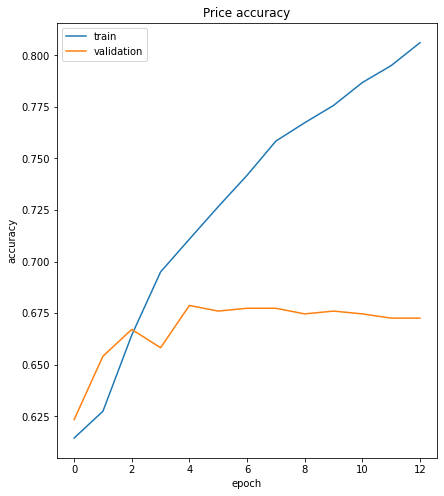

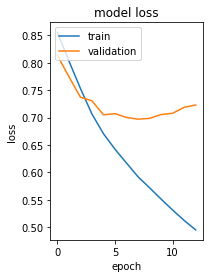

In [ ]:
# figure is used to create a new figure.
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.plot(history.history['price_sparse_categorical_accuracy'])
plt.plot(history.history['val_price_sparse_categorical_accuracy'])
plt.title('Price accuracy') # graph title
plt.ylabel('accuracy') # y axis lable
plt.xlabel('epoch') # x axis lable
plt.legend(['train', 'validation'], loc='upper left') # legend is an area describing the elements of the graph
plt.show()
plt.grid(True) # grid is the axis object's method toggles the visibility of the grid inside the figure.
plt.subplot(1, 2, 1)
plt.plot(history.history['price_loss'])
plt.plot(history.history['val_price_loss'])
plt.title('model loss')  # graph title
plt.ylabel('loss') # y axis lable
plt.xlabel('epoch')# x axis lable
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
#  (if for kaggle competition and it is about genre prediction)
pd.DataFrame(
    {'id': data_ts.id,
     'price': price_category_predicted}
).to_csv('/content/drive/MyDrive/Queens_Practical/Data_Mining/compt4/submission.csv', index=False)

#### Result

Accuracy in **kaggle** =0.68369 \
From the diagram, there is a big over-fitting, so I will try  in the next trials to reduce the over-fitting by using droupout and regularization.\
I tried different values in loss_weights and max_len (the maximum length of tokenizers) but they gave me less accuracy, so I used these values.

### **Trial 1**

* In this trial I will use:
 * Text part    
   * Embedding layer that allows us to convert each word into a fixed-length vector
   * **GRU layer** (Gated Recurrent Unit) is a mechanism in recurrent neural and it learns dependencies between time steps in time series and sequence data. It is used **100 units** and activation **tanh activation** function.

 * Image part
    * **Convolutional** layer with **32** filters, and a **16*16** mask, no padding
    * **Max pooling** with a **16*16** mask
    * **Flatten** layer
 * Multi-task learning
 * Multi-modality learning

**My thoughts and observations :** The accuracy would be between 0.68369 and 0.68555

#### Model

In [ ]:
# Two inputs, one for image and the other for text.
in_text = keras.Input(batch_shape=(None, max_len))
in_image = keras.Input(batch_shape=(None, 64, 64, 2))

# text part
embedded = keras.layers.Embedding(tokenizer.num_words, 100)(in_text)# embedding requires to encoded input data to integer encoded, so that each word is represented by a unique integer
gru= GRU(100, activation='tanh')(embedded)


# image part 
# Conv2D is a two-dimensional convolution layer that generates a tensor of outputs by winding a convolution kernel with the layers input
# MaxPool2D used to reduces the dimensionality of images that is  by reducing the number of pixels in the output from the previous convolutional layer.
cov = Conv2D(32, (16, 16))(in_image)# convolutional layer with 32 filters, and a 16*16 mask, no padding
pl = MaxPool2D((16, 16))(cov)# max pooling with a 16*16 mask
flattened = Flatten()(pl) # flatten the shape to (288,)

# fusion - combinig both the text and the image
fused = tf.concat([gru, flattened], axis=-1)

# multi-task learning (each is a multi-class classification)
# one dense layer for each task(type and price)
p_type = Dense(len_type, activation='softmax', name='type')(fused)
p_price = Dense(len_price, activation='softmax', name='price')(fused)


# define model input/output using keys.
model = keras.Model(
    inputs={
        'summary': in_text,
        'image': in_image
    },
    outputs={
        'type': p_type,
        'price': p_price,
    },
)


# compile model with optimizer, loss values for each task, loss 
# weights for each task.
model.compile(
    optimizer=Adam(),
    loss={
        'type': 'sparse_categorical_crossentropy',
        'price': 'sparse_categorical_crossentropy',
    },
    loss_weights={
        'type': 0.5,
        'price': 0.5,       
    },
    metrics={
        'type': ['SparseCategoricalAccuracy'],
        'price': ['SparseCategoricalAccuracy'],
    },
)


model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 64, 64, 2)]  0           []                               
                                                                                                  
 input_1 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 49, 49, 32)   16416       ['input_2[0][0]']                
                                                                                                  
 embedding (Embedding)          (None, 100, 100)     4000000     ['input_1[0][0]']                
                                                                                              

In [ ]:
# fit the model it takes
# inputs: summary, and image
# outputs: type, and price
history = model.fit(
    x={
        'summary': x_train_text_id,
        'image': x_train_image
    },
    y={
        'type': y_train_type,
        'price': y_train_price,
    },
    epochs=20,
    batch_size=16,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_price_loss', patience=5, ) # If val_price_loss is raised 5 times, the fit will be stopped.
    ],
    verbose=1
)

Epoch 1/20
366/366 [==============================] - 18s 14ms/step - loss: 0.9816 - price_loss: 0.8555 - type_loss: 1.1077 - price_sparse_categorical_accuracy: 0.6136 - type_sparse_categorical_accuracy: 0.7524 - val_loss: 0.8993 - val_price_loss: 0.8310 - val_type_loss: 0.9676 - val_price_sparse_categorical_accuracy: 0.6234 - val_type_sparse_categorical_accuracy: 0.7690
Epoch 2/20
366/366 [==============================] - 4s 12ms/step - loss: 0.9086 - price_loss: 0.8382 - type_loss: 0.9790 - price_sparse_categorical_accuracy: 0.6194 - type_sparse_categorical_accuracy: 0.7560 - val_loss: 0.8469 - val_price_loss: 0.8103 - val_type_loss: 0.8836 - val_price_sparse_categorical_accuracy: 0.6234 - val_type_sparse_categorical_accuracy: 0.7690
Epoch 3/20
366/366 [==============================] - 4s 12ms/step - loss: 0.8423 - price_loss: 0.8053 - type_loss: 0.8792 - price_sparse_categorical_accuracy: 0.6280 - type_sparse_categorical_accuracy: 0.7603 - val_loss: 0.8037 - val_price_loss: 0.7631

In [ ]:
# we can do prediction on testing set
y_predict = model.predict(
    {
        'summary': x_test_text,
        'image': x_test_image
    }
)


# probabilities
price_predicted = y_predict['price']
print(price_predicted)

# categories
price_category_predicted = np.argmax(price_predicted, axis=1) # argmax used to convert prob. predict to predict
print(price_category_predicted)


[[1.6504358e-01 6.4358675e-01 1.9136968e-01]
 [9.9905390e-01 9.2380145e-04 2.2291477e-05]
 [9.8986048e-01 9.6072992e-03 5.3227949e-04]
 ...
 [2.0212144e-01 6.4887899e-01 1.4899962e-01]
 [9.9692947e-01 2.8889545e-03 1.8158556e-04]
 [9.4335413e-01 5.3264953e-02 3.3808430e-03]]
[1 0 0 ... 1 0 0]


#### Display model

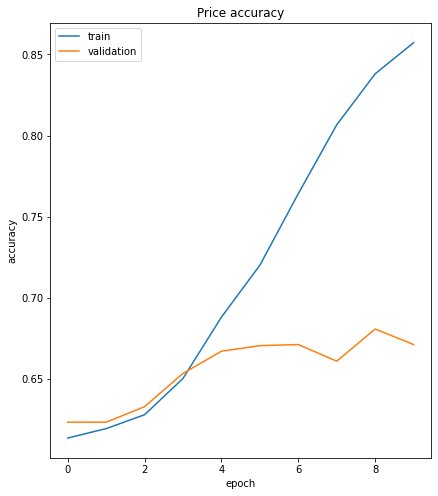

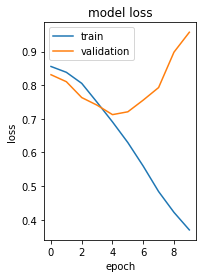

In [ ]:
# figure is used to create a new figure.
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.plot(history.history['price_sparse_categorical_accuracy'])
plt.plot(history.history['val_price_sparse_categorical_accuracy'])
plt.title('Price accuracy') # graph title
plt.ylabel('accuracy') # y axis lable
plt.xlabel('epoch') # x axis lable
plt.legend(['train', 'validation'], loc='upper left') # legend is an area describing the elements of the graph
plt.show()
plt.grid(True) # grid is the axis object's method toggles the visibility of the grid inside the figure.
plt.subplot(1, 2, 1)
plt.plot(history.history['price_loss'])
plt.plot(history.history['val_price_loss'])
plt.title('model loss')  # graph title
plt.ylabel('loss') # y axis lable
plt.xlabel('epoch')# x axis lable
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
#  (if for kaggle competition and it is about genre prediction)
pd.DataFrame(
    {'id': data_ts.id,
     'price': price_category_predicted}
).to_csv('/content/drive/MyDrive/Queens_Practical/Data_Mining/compt4/submission.csv', index=False)

#### Result

Accuracy in **kaggle** =0.64375 This GRU layer made my model's accuracy less and this is the opposite of what I expected\
From the diagram, there is a big over-fitting, so I will try  in the next trials to reduce the over-fitting by using droupout and regularization.\
I tried different values in units but they gave me less accuracy, so I used 100 units.

### **Trial 2**

* In this trial I will use:
 * Text part    
   * Embedding layer that allows us to convert each word into a fixed-length vector
   * **LSTM layer** is a kind of recurrent neural network that can learn sequence prediction issues' order dependence and it learns long-term dependencies between time steps in time series and sequence data. It is used **80 units** and activation **tanh activation** function.

 * Image part
    * **Convolutional** layer with **32** filters, and a **16*16** mask, no padding
    * **Max pooling** with a **16*16** mask
    * **Flatten** layer
 * Multi-task learning
 * Multi-modality learning

**My thoughts and observations :** The accuracy would be less than 0.64375 as GRU is better than LSTM as GRU uses fewer training parameters, which means it consumes less memory and runs faster than LSTM.

#### Model

In [ ]:
# Two inputs, one for image and the other for text.
in_text = keras.Input(batch_shape=(None, max_len))
in_image = keras.Input(batch_shape=(None, 64, 64, 2))

# text part
embedded = keras.layers.Embedding(tokenizer.num_words, 100)(in_text)# embedding requires to encoded input data to integer encoded, so that each word is represented by a unique integer
lstm= LSTM(80, activation='tanh')(embedded)


# image part 
# Conv2D is a two-dimensional convolution layer that generates a tensor of outputs by winding a convolution kernel with the layers input
# MaxPool2D used to reduces the dimensionality of images that is  by reducing the number of pixels in the output from the previous convolutional layer.
cov = Conv2D(32, (16, 16))(in_image)# convolutional layer with 32 filters, and a 16*16 mask, no padding
pl = MaxPool2D((16, 16))(cov)# max pooling with a 16*16 mask
flattened = Flatten()(pl) # flatten the shape to (288,)

# fusion - combinig both the text and the image
fused = tf.concat([lstm, flattened], axis=-1)

# multi-task learning (each is a multi-class classification)
# one dense layer for each task(type and price)
p_type = Dense(len_type, activation='softmax', name='type')(fused)
p_price = Dense(len_price, activation='softmax', name='price')(fused)


# define model input/output using keys.
model = keras.Model(
    inputs={
        'summary': in_text,
        'image': in_image
    },
    outputs={
        'type': p_type,
        'price': p_price,
    },
)


# compile model with optimizer, loss values for each task, loss 
# weights for each task.
model.compile(
    optimizer=Adam(),
    loss={
        'type': 'sparse_categorical_crossentropy',
        'price': 'sparse_categorical_crossentropy',
    },
    loss_weights={
        'type': 0.5,
        'price': 0.5,       
    },
    metrics={
        'type': ['SparseCategoricalAccuracy'],
        'price': ['SparseCategoricalAccuracy'],
    },
)


model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 64, 64, 2)]  0           []                               
                                                                                                  
 input_5 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 conv2d_2 (Conv2D)              (None, 49, 49, 32)   16416       ['input_6[0][0]']                
                                                                                                  
 embedding_2 (Embedding)        (None, 100, 100)     4000000     ['input_5[0][0]']                
                                                                                            

In [ ]:
# fit the model it takes
# inputs: summary, and image
# outputs: type, and price
history = model.fit(
    x={
        'summary': x_train_text_id,
        'image': x_train_image
    },
    y={
        'type': y_train_type,
        'price': y_train_price,
    },
    epochs=20,
    batch_size=16,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_price_loss', patience=5, ) # If val_price_loss is raised 5 times, the fit will be stopped.
    ],
    verbose=1
)

Epoch 1/20
366/366 [==============================] - 7s 14ms/step - loss: 0.9747 - price_loss: 0.8469 - type_loss: 1.1025 - price_sparse_categorical_accuracy: 0.6191 - type_sparse_categorical_accuracy: 0.7541 - val_loss: 0.8962 - val_price_loss: 0.8326 - val_type_loss: 0.9598 - val_price_sparse_categorical_accuracy: 0.6234 - val_type_sparse_categorical_accuracy: 0.7690
Epoch 2/20
366/366 [==============================] - 4s 12ms/step - loss: 0.9302 - price_loss: 0.8438 - type_loss: 1.0166 - price_sparse_categorical_accuracy: 0.6203 - type_sparse_categorical_accuracy: 0.7560 - val_loss: 0.8973 - val_price_loss: 0.8327 - val_type_loss: 0.9618 - val_price_sparse_categorical_accuracy: 0.6234 - val_type_sparse_categorical_accuracy: 0.7690
Epoch 3/20
366/366 [==============================] - 4s 12ms/step - loss: 0.9279 - price_loss: 0.8418 - type_loss: 1.0139 - price_sparse_categorical_accuracy: 0.6203 - type_sparse_categorical_accuracy: 0.7560 - val_loss: 0.8979 - val_price_loss: 0.8345 

In [ ]:
# we can do prediction on testing set
y_predict = model.predict(
    {
        'summary': x_test_text,
        'image': x_test_image
    }
)


# probabilities
price_predicted = y_predict['price']
print(price_predicted)

# categories
price_category_predicted = np.argmax(price_predicted, axis=1) # argmax used to convert prob. predict to predict
print(price_category_predicted)


[[0.3513928  0.5467548  0.10185243]
 [0.83175594 0.15215978 0.01608429]
 [0.48723155 0.455161   0.0576074 ]
 ...
 [0.8229355  0.16006584 0.01699863]
 [0.80014783 0.18042235 0.0194298 ]
 [0.67538226 0.29080954 0.03380821]]
[1 0 0 ... 0 0 0]


#### Display model

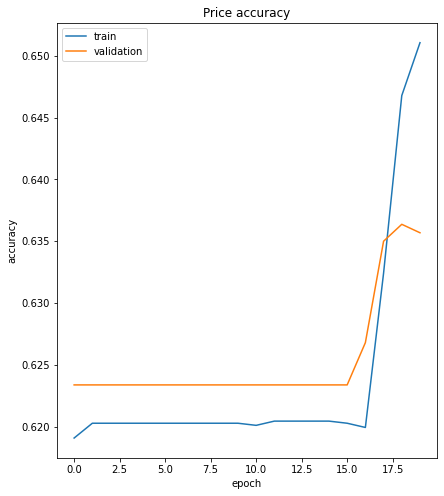

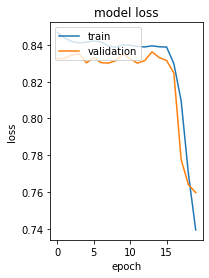

In [ ]:
# figure is used to create a new figure.
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.plot(history.history['price_sparse_categorical_accuracy'])
plt.plot(history.history['val_price_sparse_categorical_accuracy'])
plt.title('Price accuracy') # graph title
plt.ylabel('accuracy') # y axis lable
plt.xlabel('epoch') # x axis lable
plt.legend(['train', 'validation'], loc='upper left') # legend is an area describing the elements of the graph
plt.show()
plt.grid(True) # grid is the axis object's method toggles the visibility of the grid inside the figure.
plt.subplot(1, 2, 1)
plt.plot(history.history['price_loss'])
plt.plot(history.history['val_price_loss'])
plt.title('model loss')  # graph title
plt.ylabel('loss') # y axis lable
plt.xlabel('epoch')# x axis lable
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
#  (if for kaggle competition and it is about genre prediction)
pd.DataFrame(
    {'id': data_ts.id,
     'price': price_category_predicted}
).to_csv('/content/drive/MyDrive/Queens_Practical/Data_Mining/compt4/submission.csv', index=False)

#### Result

Accuracy in **kaggle** =0.62201 The result was as I expected.\
From the diagram, there is a big over-fitting but less than GRU, so I will try in the next trials to reduce the over-fitting by using droupout and regularization.\
I tried different values in units but they gave me less accuracy, so I used 80 units.

### **Trial 3**

* In this trial I will use:
 * Text part    
   * Embedding layer that allows us to convert each word into a fixed-length vector
   * **GRU layer** with **BiDirectional layer** Bidirectional that connect 2 hidden layers of opposite directions to the same output. It is used **90 units** and activation **tanh activation** function.
   * **Dropout** = 30% to reduce overfitting.
 * Image part
    * **Convolutional** layer with **32** filters, and a **16*16** mask, no padding
    * **Max pooling** with a **16*16** mask
    * **Flatten** layer
 * Multi-task learning
 * Multi-modality learning


**My thoughts and observations :** The accuracy would be between 0.64375 and 0.0.65000. It will be better than previous trials(1, and 2) as i will use both GRU and BiDirectional layer

#### Model

In [ ]:
# Two inputs, one for image and the other for text.
in_text = keras.Input(batch_shape=(None, max_len))
in_image = keras.Input(batch_shape=(None, 64, 64, 2))

# text part
embedded = keras.layers.Embedding(tokenizer.num_words, 100)(in_text)# embedding requires to encoded input data to integer encoded, so that each word is represented by a unique integer
gru= Bidirectional(GRU(90, activation='tanh'))(embedded)
gru= Dropout(0.3)(gru)


# image part 
# Conv2D is a two-dimensional convolution layer that generates a tensor of outputs by winding a convolution kernel with the layers input
# MaxPool2D used to reduces the dimensionality of images that is  by reducing the number of pixels in the output from the previous convolutional layer.
cov = Conv2D(32, (16, 16))(in_image)# convolutional layer with 32 filters, and a 16*16 mask, no padding
pl = MaxPool2D((16, 16))(cov)# max pooling with a 16*16 mask
flattened = Flatten()(pl) # flatten the shape to (288,)

# fusion - combinig both the text and the image
fused = tf.concat([gru, flattened], axis=-1)

# multi-task learning (each is a multi-class classification)
# one dense layer for each task(type and price)
p_type = Dense(len_type, activation='softmax', name='type')(fused)
p_price = Dense(len_price, activation='softmax', name='price')(fused)


# define model input/output using keys.
model = keras.Model(
    inputs={
        'summary': in_text,
        'image': in_image
    },
    outputs={
        'type': p_type,
        'price': p_price,
    },
)


# compile model with optimizer, loss values for each task, loss 
# weights for each task.
model.compile(
    optimizer=Adam(),
    loss={
        'type': 'sparse_categorical_crossentropy',
        'price': 'sparse_categorical_crossentropy',
    },
    loss_weights={
        'type': 0.5,
        'price': 0.5,       
    },
    metrics={
        'type': ['SparseCategoricalAccuracy'],
        'price': ['SparseCategoricalAccuracy'],
    },
)


model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 64, 64, 2)]  0           []                               
                                                                                                  
 embedding (Embedding)          (None, 100, 100)     4000000     ['input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 49, 49, 32)   16416       ['input_2[0][0]']                
                                                                                              

In [ ]:
# fit the model it takes
# inputs: summary, and image
# outputs: type, and price
history = model.fit(
    x={
        'summary': x_train_text_id,
        'image': x_train_image
    },
    y={
        'type': y_train_type,
        'price': y_train_price,
    },
    epochs=20,
    batch_size=16,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_price_loss', patience=5, ) # If val_price_loss is raised 5 times, the fit will be stopped.
    ],
    verbose=1
)

Epoch 1/20
366/366 [==============================] - 41s 73ms/step - loss: 0.9397 - price_loss: 0.8298 - type_loss: 1.0497 - price_sparse_categorical_accuracy: 0.6187 - type_sparse_categorical_accuracy: 0.7564 - val_loss: 0.7959 - val_price_loss: 0.7362 - val_type_loss: 0.8556 - val_price_sparse_categorical_accuracy: 0.6664 - val_type_sparse_categorical_accuracy: 0.7710
Epoch 2/20
366/366 [==============================] - 24s 65ms/step - loss: 0.7661 - price_loss: 0.7306 - type_loss: 0.8016 - price_sparse_categorical_accuracy: 0.6717 - type_sparse_categorical_accuracy: 0.7764 - val_loss: 0.7610 - val_price_loss: 0.7191 - val_type_loss: 0.8029 - val_price_sparse_categorical_accuracy: 0.6794 - val_type_sparse_categorical_accuracy: 0.7833
Epoch 3/20
366/366 [==============================] - 26s 72ms/step - loss: 0.6787 - price_loss: 0.6598 - type_loss: 0.6976 - price_sparse_categorical_accuracy: 0.7136 - type_sparse_categorical_accuracy: 0.7998 - val_loss: 0.7669 - val_price_loss: 0.73

In [ ]:
# we can do prediction on testing set
y_predict = model.predict(
    {
        'summary': x_test_text,
        'image': x_test_image
    }
)


# probabilities
price_predicted = y_predict['price']
print(price_predicted)

# categories
price_category_predicted = np.argmax(price_predicted, axis=1) # argmax used to convert prob. predict to predict
print(price_category_predicted)


[[2.9760212e-01 4.8600954e-01 2.1638831e-01]
 [9.9659556e-01 3.2409441e-03 1.6341911e-04]
 [9.8969275e-01 9.3486663e-03 9.5863122e-04]
 ...
 [3.8605195e-01 5.5135822e-01 6.2589809e-02]
 [9.9580258e-01 3.6989360e-03 4.9847347e-04]
 [4.2310181e-01 5.3425086e-01 4.2647295e-02]]
[1 0 0 ... 1 0 1]


#### Display model

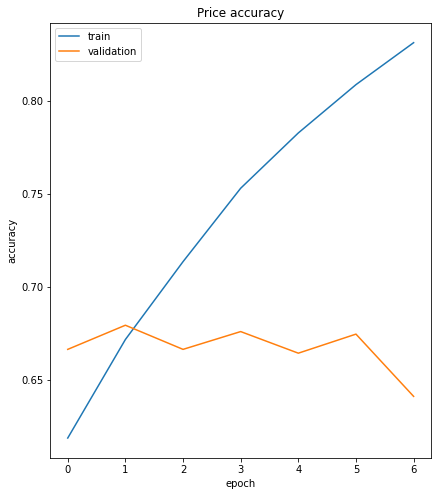

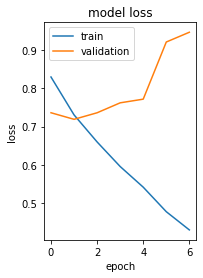

In [ ]:
# figure is used to create a new figure.
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.plot(history.history['price_sparse_categorical_accuracy'])
plt.plot(history.history['val_price_sparse_categorical_accuracy'])
plt.title('Price accuracy') # graph title
plt.ylabel('accuracy') # y axis lable
plt.xlabel('epoch') # x axis lable
plt.legend(['train', 'validation'], loc='upper left') # legend is an area describing the elements of the graph
plt.show()
plt.grid(True) # grid is the axis object's method toggles the visibility of the grid inside the figure.
plt.subplot(1, 2, 1)
plt.plot(history.history['price_loss'])
plt.plot(history.history['val_price_loss'])
plt.title('model loss')  # graph title
plt.ylabel('loss') # y axis lable
plt.xlabel('epoch')# x axis lable
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
#  (if for kaggle competition and it is about genre prediction)
pd.DataFrame(
    {'id': data_ts.id,
     'price': price_category_predicted}
).to_csv('/content/drive/MyDrive/Queens_Practical/Data_Mining/compt4/submission.csv', index=False)

#### Result

Accuracy in **kaggle** =0.66086 with 90 units and dropout rate = 0.3\
In the prevois trials, there was a lot of overfitting, so in this trial I used dropout to reduce this overfitting, and the overfitting reduced.\
I tried different values in rate but they gave me less accuracy.

### **Trial 4**

* In this trial I will use:
 * Text part    
   * Embedding layer that allows us to convert each word into a fixed-length vector
   * **Average** layer
 * Image part
    * **Convolutional** layer with **32** filters, and a **16*16** mask, no padding
   * **Dropout** = 30% to reduce overfitting.
    * **Max pooling** with a **16*16** mask
    * **Flatten** layer
 * Multi-task learning
 * Multi-modality learning

**My thoughts and observations :** The accuracy would be between 0.66000 and 0.67000 as I will try to reduce overfitting in the previous trial so the accuracy will be increase.

#### Model

In [ ]:
# Two inputs, one for image and the other for text.
in_text = keras.Input(batch_shape=(None, max_len))
in_image = keras.Input(batch_shape=(None, 64, 64, 2))

# text part
embedded = keras.layers.Embedding(tokenizer.num_words, 100)(in_text)# embedding requires to encoded input data to integer encoded, so that each word is represented by a unique integer
averaged = tf.reduce_mean(embedded, axis=1)  # reduce_mean that compute the mean value of embeddded


# image part 
# Conv2D is a two-dimensional convolution layer that generates a tensor of outputs by winding a convolution kernel with the layers input
# MaxPool2D used to reduces the dimensionality of images that is  by reducing the number of pixels in the output from the previous convolutional layer.
cov = Conv2D(32, (16, 16))(in_image)  # convolutional layer with 32 filters, and a 16*16 mask, no padding
drop_img=Dropout(0.3)(cov) # 30% dropout
pl = MaxPool2D((16, 16))(drop_img)  # max pooling with a 16*16 mask
flattened = Flatten()(pl) # flatten the shape to (288,)

# fusion - combinig both the text and the image
fused = tf.concat([averaged, flattened], axis=-1)

# multi-task learning (each is a multi-class classification)
# one dense layer for each task(type and price)
p_type = Dense(len_type, activation='softmax', name='type')(fused)
p_price = Dense(len_price, activation='softmax', name='price')(fused)


# define model input/output using keys.
model = keras.Model(
    inputs={
        'summary': in_text,
        'image': in_image
    },
    outputs={
        'type': p_type,
        'price': p_price,
    },
)


# compile model with optimizer, loss values for each task, loss 
# weights for each task.
model.compile(
    optimizer=Adam(),
    loss={
        'type': 'sparse_categorical_crossentropy',
        'price': 'sparse_categorical_crossentropy',
    },
    loss_weights={
        'type': 0.5,
        'price': 0.5,       
    },
    metrics={
        'type': ['SparseCategoricalAccuracy'],
        'price': ['SparseCategoricalAccuracy'],
    },
)


model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 64, 64, 2)]  0           []                               
                                                                                                  
 conv2d_1 (Conv2D)              (None, 49, 49, 32)   16416       ['input_4[0][0]']                
                                                                                                  
 input_3 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 dropout_1 (Dropout)            (None, 49, 49, 32)   0           ['conv2d_1[0][0]']               
                                                                                            

In [ ]:
# fit the model it takes
# inputs: summary, and image
# outputs: type, and price
history = model.fit(
    x={
        'summary': x_train_text_id,
        'image': x_train_image
    },
    y={
        'type': y_train_type,
        'price': y_train_price,
    },
    epochs=20,
    batch_size=16,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_price_loss', patience=5, ) # If val_price_loss is raised 5 times, the fit will be stopped.
    ],
    verbose=1
)

Epoch 1/20
366/366 [==============================] - 6s 15ms/step - loss: 1.0712 - price_loss: 0.8533 - type_loss: 1.2892 - price_sparse_categorical_accuracy: 0.6172 - type_sparse_categorical_accuracy: 0.7512 - val_loss: 0.9103 - val_price_loss: 0.8228 - val_type_loss: 0.9979 - val_price_sparse_categorical_accuracy: 0.6234 - val_type_sparse_categorical_accuracy: 0.7690
Epoch 2/20
366/366 [==============================] - 5s 14ms/step - loss: 0.8995 - price_loss: 0.8152 - type_loss: 0.9838 - price_sparse_categorical_accuracy: 0.6198 - type_sparse_categorical_accuracy: 0.7560 - val_loss: 0.8749 - val_price_loss: 0.7941 - val_type_loss: 0.9557 - val_price_sparse_categorical_accuracy: 0.6241 - val_type_sparse_categorical_accuracy: 0.7690
Epoch 3/20
366/366 [==============================] - 5s 13ms/step - loss: 0.8639 - price_loss: 0.7779 - type_loss: 0.9500 - price_sparse_categorical_accuracy: 0.6451 - type_sparse_categorical_accuracy: 0.7560 - val_loss: 0.8448 - val_price_loss: 0.7669 

In [ ]:
# we can do prediction on testing set
y_predict = model.predict(
    {
        'summary': x_test_text,
        'image': x_test_image
    }
)


# probabilities
price_predicted = y_predict['price']
print(price_predicted)

# categories
price_category_predicted = np.argmax(price_predicted, axis=1) # argmax used to convert prob. predict to predict
print(price_category_predicted)


[[0.5168459  0.36920738 0.11394678]
 [0.9747766  0.02028225 0.00494115]
 [0.86796427 0.08199359 0.05004215]
 ...
 [0.7106156  0.2534165  0.03596792]
 [0.98289895 0.01129418 0.00580691]
 [0.75204504 0.22015253 0.02780252]]
[0 0 0 ... 0 0 0]


#### Display model

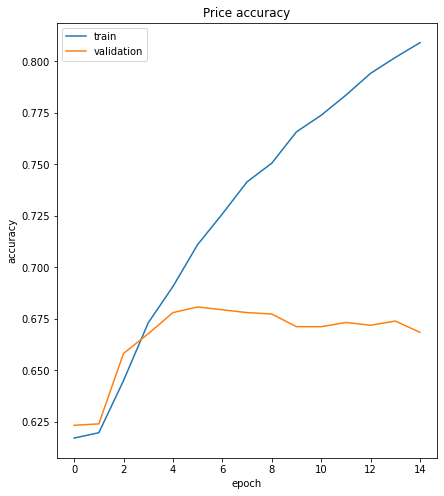

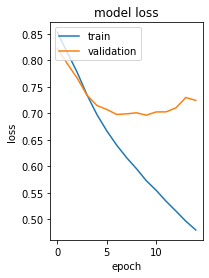

In [ ]:
# figure is used to create a new figure.
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.plot(history.history['price_sparse_categorical_accuracy'])
plt.plot(history.history['val_price_sparse_categorical_accuracy'])
plt.title('Price accuracy') # graph title
plt.ylabel('accuracy') # y axis lable
plt.xlabel('epoch') # x axis lable
plt.legend(['train', 'validation'], loc='upper left') # legend is an area describing the elements of the graph
plt.show()
plt.grid(True) # grid is the axis object's method toggles the visibility of the grid inside the figure.
plt.subplot(1, 2, 1)
plt.plot(history.history['price_loss'])
plt.plot(history.history['val_price_loss'])
plt.title('model loss')  # graph title
plt.ylabel('loss') # y axis lable
plt.xlabel('epoch')# x axis lable
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
#  (if for kaggle competition and it is about genre prediction)
pd.DataFrame(
    {'id': data_ts.id,
     'price': price_category_predicted}
).to_csv('/content/drive/MyDrive/Queens_Practical/Data_Mining/compt4/submission.csv', index=False)

#### Result

Accuracy in **kaggle** =0.67282 \
In the prevois trials, there was a lot of overfitting, so in this trial I used dropout in image to reduce this overfitting, and the overfitting reduced.
I tried different values in rate but they gave me less accuracy.

### **Trial 5**

* In this trial I will use:
 * Text part    
   * Embedding layer that allows us to convert each word into a fixed-length vector
   * **Average layer**
   * **Dropout** = 50% to reduce overfitting.
 * Image part
    * **Convolutional** layer with **32** filters, and a **16*16** mask, no padding
    * **Max pooling** with a **16*16** mask
    * **Flatten** layer
 * Multi-task learning
 * Multi-modality learning

**My thoughts and observations :** The accuracy would be between 0.67 and 0.68 as from the previous trials the average layer gave me high accuracy than GRU and LSTM so I think the accuracy will be increased with dropout.

#### Model

In [ ]:
# Two inputs, one for image and the other for text.
in_text = keras.Input(batch_shape=(None, max_len))
in_image = keras.Input(batch_shape=(None, 64, 64, 2))

# text part
embedded = keras.layers.Embedding(tokenizer.num_words, 100)(in_text)# embedding requires to encoded input data to integer encoded, so that each word is represented by a unique integer
averaged = tf.reduce_mean(embedded, axis=1)  # reduce_mean that compute the mean value of embeddded
averaged= Dropout(0.5)(averaged)# 50% dropout

# image part 
# Conv2D is a two-dimensional convolution layer that generates a tensor of outputs by winding a convolution kernel with the layers input
# MaxPool2D used to reduces the dimensionality of images that is  by reducing the number of pixels in the output from the previous convolutional layer.
cov = Conv2D(32, (16, 16))(in_image) # convolutional layer with 32 filters, and a 16*16 mask, no padding
pl = MaxPool2D((16, 16))(cov) # max pooling with a 16*16 mask
flattened = Flatten()(pl) # flatten the shape to (288,)

# fusion - combinig both the text and the image
fused = tf.concat([averaged, flattened], axis=-1)

# multi-task learning (each is a multi-class classification)
# one dense layer for each task(type and price)
p_type = Dense(len_type, activation='softmax', name='type')(fused)
p_price = Dense(len_price, activation='softmax', name='price')(fused)


# define model input/output using keys.
model = keras.Model(
    inputs={
        'summary': in_text,
        'image': in_image
    },
    outputs={
        'type': p_type,
        'price': p_price,
    },
)


# compile model with optimizer, loss values for each task, loss 
# weights for each task.
model.compile(
    optimizer=Adam(),
    loss={
        'type': 'sparse_categorical_crossentropy',
        'price': 'sparse_categorical_crossentropy',
    },
    loss_weights={
        'type': 0.5,
        'price': 0.5,       
    },
    metrics={
        'type': ['SparseCategoricalAccuracy'],
        'price': ['SparseCategoricalAccuracy'],
    },
)


model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 64, 64, 2)]  0           []                               
                                                                                                  
 embedding (Embedding)          (None, 100, 100)     4000000     ['input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 49, 49, 32)   16416       ['input_2[0][0]']                
                                                                                              

In [ ]:
# fit the model it takes
# inputs: summary, and image
# outputs: type, and price
history = model.fit(
    x={
        'summary': x_train_text_id,
        'image': x_train_image
    },
    y={
        'type': y_train_type,
        'price': y_train_price,
    },
    epochs=20,
    batch_size=16,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_price_loss', patience=5, ) # If val_price_loss is raised 5 times, the fit will be stopped.
    ],
    verbose=1
)

Epoch 1/20
366/366 [==============================] - 14s 9ms/step - loss: 1.0434 - price_loss: 0.8474 - type_loss: 1.2394 - price_sparse_categorical_accuracy: 0.6163 - type_sparse_categorical_accuracy: 0.7495 - val_loss: 0.8865 - val_price_loss: 0.8196 - val_type_loss: 0.9535 - val_price_sparse_categorical_accuracy: 0.6234 - val_type_sparse_categorical_accuracy: 0.7690
Epoch 2/20
366/366 [==============================] - 3s 7ms/step - loss: 0.9067 - price_loss: 0.8169 - type_loss: 0.9965 - price_sparse_categorical_accuracy: 0.6222 - type_sparse_categorical_accuracy: 0.7560 - val_loss: 0.8618 - val_price_loss: 0.7899 - val_type_loss: 0.9337 - val_price_sparse_categorical_accuracy: 0.6316 - val_type_sparse_categorical_accuracy: 0.7690
Epoch 3/20
366/366 [==============================] - 3s 7ms/step - loss: 0.8760 - price_loss: 0.7801 - type_loss: 0.9720 - price_sparse_categorical_accuracy: 0.6428 - type_sparse_categorical_accuracy: 0.7560 - val_loss: 0.8383 - val_price_loss: 0.7632 - 

In [ ]:
# we can do prediction on testing set
y_predict = model.predict(
    {
        'summary': x_test_text,
        'image': x_test_image
    }
)


# probabilities
price_predicted = y_predict['price']
print(price_predicted)

# categories
price_category_predicted = np.argmax(price_predicted, axis=1) # argmax used to convert prob. predict to predict
print(price_category_predicted)


[[0.5509342  0.33699557 0.11207027]
 [0.96520543 0.02815144 0.00664322]
 [0.8338362  0.11078838 0.05537539]
 ...
 [0.69203424 0.25949806 0.04846768]
 [0.9696353  0.02205317 0.00831143]
 [0.70490825 0.25397128 0.04112046]]
[0 0 0 ... 0 0 0]


#### Display model

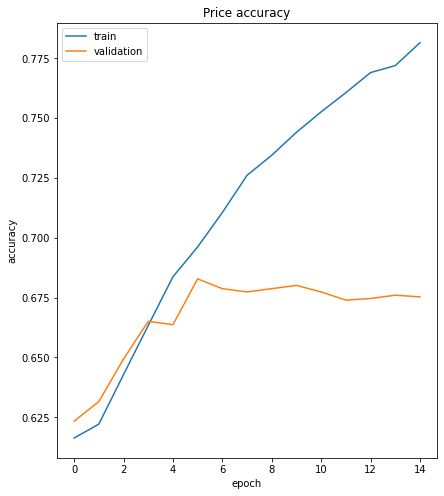

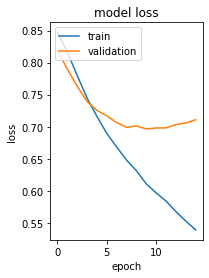

In [ ]:
# figure is used to create a new figure.
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.plot(history.history['price_sparse_categorical_accuracy'])
plt.plot(history.history['val_price_sparse_categorical_accuracy'])
plt.title('Price accuracy') # graph title
plt.ylabel('accuracy') # y axis lable
plt.xlabel('epoch') # x axis lable
plt.legend(['train', 'validation'], loc='upper left') # legend is an area describing the elements of the graph
plt.show()
plt.grid(True) # grid is the axis object's method toggles the visibility of the grid inside the figure.
plt.subplot(1, 2, 1)
plt.plot(history.history['price_loss'])
plt.plot(history.history['val_price_loss'])
plt.title('model loss')  # graph title
plt.ylabel('loss') # y axis lable
plt.xlabel('epoch')# x axis lable
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
#  (if for kaggle competition and it is about genre prediction)
pd.DataFrame(
    {'id': data_ts.id,
     'price': price_category_predicted}
).to_csv('/content/drive/MyDrive/Queens_Practical/Data_Mining/compt4/submission.csv', index=False)

#### Result

Accuracy in **kaggle** =0.68614 \
In the prevois trials, there was a lot of overfitting, so in this trial I used dropout in text to reduce this overfitting, and the overfitting reduced. I tried different values in rate but they gave me less accuracy.

### **Trial 6**

* In this trial I will use:
 * Text part    
   * Embedding layer that allows us to convert each word into a fixed-length vector
   * **GRU layer** with **BiDirectional layer** Bidirectional that connect 2 hidden layers of opposite directions to the same output. It is used **90 units**, activation **tanh activation** function, and **l2 = 0.02 regularizer** .
   * **Dropout** = 70% to reduce overfitting.
 * Image part
    * **Convolutional** layer with **32** filters, and a **16*16** mask, no padding
    * **Max pooling** with a **16*16** mask
    * **Flatten** layer
 * Multi-task learning
 * Multi-modality learning

**My thoughts and observations :** The accuracy would be between 0.62 and 0.63 It will give me less accuracy than trial 5 as I used BiDirectional and GRU layer

#### Model

In [ ]:
# Two inputs, one for image and the other for text.
in_text = keras.Input(batch_shape=(None, max_len))
in_image = keras.Input(batch_shape=(None, 64, 64, 2))

# text part
embedded = keras.layers.Embedding(tokenizer.num_words, 100)(in_text)# embedding requires to encoded input data to integer encoded, so that each word is represented by a unique integer
gru= Bidirectional(GRU(90, activation='tanh', activity_regularizer=l2(0.02)))(embedded)
gru= Dropout(0.7)(gru)

# image part 
# Conv2D is a two-dimensional convolution layer that generates a tensor of outputs by winding a convolution kernel with the layers input
# MaxPool2D used to reduces the dimensionality of images that is  by reducing the number of pixels in the output from the previous convolutional layer.
cov = Conv2D(32, (16, 16))(in_image) # convolutional layer with 32 filters, and a 16*16 mask, no padding
pl = MaxPool2D((16, 16))(cov)# max pooling with a 16*16 mask
flattened = Flatten()(pl) # flatten the shape to (288,)

# fusion - combinig both the text and the image
fused = tf.concat([gru, flattened], axis=-1)

# multi-task learning (each is a multi-class classification)
# one dense layer for each task(type and price)
p_type = Dense(len_type, activation='softmax', name='type')(fused)
p_price = Dense(len_price, activation='softmax', name='price')(fused)


# define model input/output using keys.
model = keras.Model(
    inputs={
        'summary': in_text,
        'image': in_image
    },
    outputs={
        'type': p_type,
        'price': p_price,
    },
)


# compile model with optimizer, loss values for each task, loss 
# weights for each task.
model.compile(
    optimizer=Adam(),
    loss={
        'type': 'sparse_categorical_crossentropy',
        'price': 'sparse_categorical_crossentropy',
    },
    loss_weights={
        'type': 0.5,
        'price': 0.5,       
    },
    metrics={
        'type': ['SparseCategoricalAccuracy'],
        'price': ['SparseCategoricalAccuracy'],
    },
)


model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 64, 64, 2)]  0           []                               
                                                                                                  
 embedding (Embedding)          (None, 100, 100)     4000000     ['input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 49, 49, 32)   16416       ['input_2[0][0]']                
                                                                                              

In [ ]:
# fit the model it takes
# inputs: summary, and image
# outputs: type, and price
history = model.fit(
    x={
        'summary': x_train_text_id,
        'image': x_train_image
    },
    y={
        'type': y_train_type,
        'price': y_train_price,
    },
    epochs=20,
    batch_size=16,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_price_loss', patience=5, ) # If val_price_loss is raised 5 times, the fit will be stopped.
    ],
    verbose=1
)

Epoch 1/20
366/366 [==============================] - 38s 64ms/step - loss: 0.9848 - price_loss: 0.8322 - type_loss: 1.0799 - price_sparse_categorical_accuracy: 0.6186 - type_sparse_categorical_accuracy: 0.7509 - val_loss: 0.8311 - val_price_loss: 0.7633 - val_type_loss: 0.8761 - val_price_sparse_categorical_accuracy: 0.6535 - val_type_sparse_categorical_accuracy: 0.7690
Epoch 2/20
366/366 [==============================] - 22s 61ms/step - loss: 0.8101 - price_loss: 0.7387 - type_loss: 0.8425 - price_sparse_categorical_accuracy: 0.6618 - type_sparse_categorical_accuracy: 0.7632 - val_loss: 0.8041 - val_price_loss: 0.7279 - val_type_loss: 0.8392 - val_price_sparse_categorical_accuracy: 0.6781 - val_type_sparse_categorical_accuracy: 0.7799
Epoch 3/20
366/366 [==============================] - 23s 63ms/step - loss: 0.7363 - price_loss: 0.6756 - type_loss: 0.7470 - price_sparse_categorical_accuracy: 0.7054 - type_sparse_categorical_accuracy: 0.7847 - val_loss: 0.8031 - val_price_loss: 0.74

In [ ]:
# we can do prediction on testing set
y_predict = model.predict(
    {
        'summary': x_test_text,
        'image': x_test_image
    }
)


# probabilities
price_predicted = y_predict['price']
print(price_predicted)

# categories
price_category_predicted = np.argmax(price_predicted, axis=1) # argmax used to convert prob. predict to predict
print(price_category_predicted)


[[7.8318395e-02 4.8646656e-01 4.3521503e-01]
 [9.9710244e-01 2.2087069e-03 6.8884692e-04]
 [9.9030882e-01 6.1608180e-03 3.5304301e-03]
 ...
 [3.6688262e-01 5.1931810e-01 1.1379923e-01]
 [9.9636948e-01 2.1266027e-03 1.5039005e-03]
 [4.0329200e-01 5.1115769e-01 8.5550368e-02]]
[1 0 0 ... 1 0 1]


#### Display model

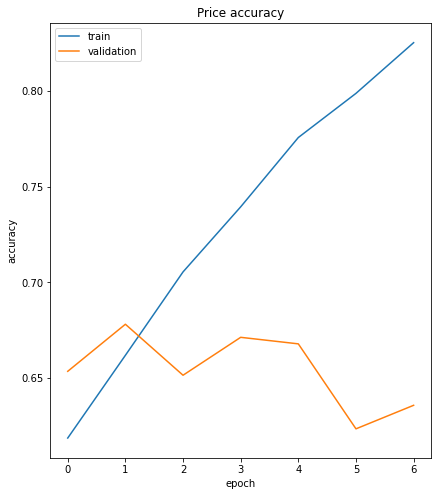

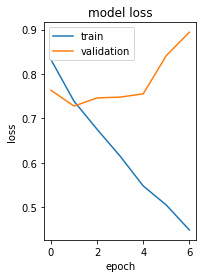

In [ ]:
# figure is used to create a new figure.
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.plot(history.history['price_sparse_categorical_accuracy'])
plt.plot(history.history['val_price_sparse_categorical_accuracy'])
plt.title('Price accuracy') # graph title
plt.ylabel('accuracy') # y axis lable
plt.xlabel('epoch') # x axis lable
plt.legend(['train', 'validation'], loc='upper left') # legend is an area describing the elements of the graph
plt.show()
plt.grid(True) # grid is the axis object's method toggles the visibility of the grid inside the figure.
plt.subplot(1, 2, 1)
plt.plot(history.history['price_loss'])
plt.plot(history.history['val_price_loss'])
plt.title('model loss')  # graph title
plt.ylabel('loss') # y axis lable
plt.xlabel('epoch')# x axis lable
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
#  (if for kaggle competition and it is about genre prediction)
pd.DataFrame(
    {'id': data_ts.id,
     'price': price_category_predicted}
).to_csv('/content/drive/MyDrive/Queens_Practical/Data_Mining/compt4/submission.csv', index=False)

#### Result

Accuracy in **kaggle** =0.65135 \
In the prevois trials, there was a lot of overfitting, so in this trial I used dropout and Regularizer in text to reduce this overfitting but It is not reduced as I expected. I tried different values in rate and tried l1,and l1_l2 but they gave me less accuracy.

### **Trial 7**

* In this trial I will use:
 * Text part    
   * Embedding layer that allows us to convert each word into a fixed-length vector
   * **GRU layer** with **BiDirectional layer** Bidirectional connect 2 hidden layers of opposite directions to the same output. It is used **100 units**, and **l2 = 0.01 regularizer** .
   * **Dropout** = 30% to reduce overfitting.
 * Image part
    * **Convolutional** layer with **16** filters, and a **3*3** mask, no padding
    * **Max pooling** with a **3*3** mask
    * **Convolutional** layer with **32** filters, and a **2*2** mask, no padding
    * **Max pooling** with a **2*2** mask
    * **Flatten** layer
 * Multi-task learning
 * Multi-modality learning

I try to reduce overfitting by changing the number of layers in the image part and using both dropout and regularizer in the text part.\
**My thoughts and observations :** The accuracy would be between 0.65 and 0.66 as I used more layers that reduce overfitting in the same model.

#### Model

In [ ]:
# Two inputs, one for image and the other for text.
in_text = keras.Input(batch_shape=(None, max_len))
in_image = keras.Input(batch_shape=(None, 64, 64, 2))

# text part
embedded = keras.layers.Embedding(tokenizer.num_words, 100)(in_text)# embedding requires to encoded input data to integer encoded, so that each word is represented by a unique integer
gru= Bidirectional(GRU(100, activity_regularizer=l2(0.01)))(embedded) 
gru= Dropout(0.3)(gru)# 30% dropout

# image part 
# Conv2D is a two-dimensional convolution layer that generates a tensor of outputs by winding a convolution kernel with the layers input
# MaxPool2D used to reduces the dimensionality of images that is  by reducing the number of pixels in the output from the previous convolutional layer.
cov = Conv2D(16, (3, 3))(in_image) # convolutional layer with 16 filters, and a 3x3 mask, no padding
pl = MaxPool2D((3, 3))(cov) # max pooling with a 3x3 mask
cov2 = Conv2D(32, (2,2))(pl) # convolutional layer with 32 filters, and a 2x2 mask, no padding
pl2 = MaxPool2D((2,2))(cov2) # max pooling with a 2x2 mask
flattened = Flatten()(pl2) # flatten the shape to (2592,)

# fusion - combinig both the text and the image
fused = tf.concat([gru, flattened], axis=-1)

# multi-task learning (each is a multi-class classification)
# one dense layer for each task(type and price)
p_type = Dense(len_type, activation='softmax', name='type')(fused)
p_price = Dense(len_price, activation='softmax', name='price')(fused)


# define model input/output using keys.
model = keras.Model(
    inputs={
        'summary': in_text,
        'image': in_image
    },
    outputs={
        'type': p_type,
        'price': p_price,
    },
)


# compile model with optimizer, loss values for each task, loss 
# weights for each task.
model.compile(
    optimizer=Adam(),
    loss={
        'type': 'sparse_categorical_crossentropy',
        'price': 'sparse_categorical_crossentropy',
    },
    loss_weights={
        'type': 0.5,
        'price': 0.5,       
    },
    metrics={
        'type': ['SparseCategoricalAccuracy'],
        'price': ['SparseCategoricalAccuracy'],
    },
)


model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 64, 64, 2)]  0           []                               
                                                                                                  
 conv2d_3 (Conv2D)              (None, 62, 62, 16)   304         ['input_6[0][0]']                
                                                                                                  
 input_5 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 max_pooling2d_3 (MaxPooling2D)  (None, 20, 20, 16)  0           ['conv2d_3[0][0]']               
                                                                                            

In [ ]:
# fit the model it takes
# inputs: summary, and image
# outputs: type, and price
history = model.fit(
    x={
        'summary': x_train_text_id,
        'image': x_train_image
    },
    y={
        'type': y_train_type,
        'price': y_train_price,
    },
    epochs=20,
    batch_size=16,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_price_loss', patience=5, ) # If val_price_loss is raised 5 times, the fit will be stopped.
    ],
    verbose=1
)

Epoch 1/20
366/366 [==============================] - 29s 65ms/step - loss: 0.9352 - price_loss: 0.8044 - type_loss: 1.0427 - price_sparse_categorical_accuracy: 0.6271 - type_sparse_categorical_accuracy: 0.7547 - val_loss: 0.8037 - val_price_loss: 0.7368 - val_type_loss: 0.8449 - val_price_sparse_categorical_accuracy: 0.6815 - val_type_sparse_categorical_accuracy: 0.7792
Epoch 2/20
366/366 [==============================] - 21s 56ms/step - loss: 0.7772 - price_loss: 0.6989 - type_loss: 0.8199 - price_sparse_categorical_accuracy: 0.6887 - type_sparse_categorical_accuracy: 0.7765 - val_loss: 0.7769 - val_price_loss: 0.7233 - val_type_loss: 0.7990 - val_price_sparse_categorical_accuracy: 0.6767 - val_type_sparse_categorical_accuracy: 0.7792
Epoch 3/20
366/366 [==============================] - 23s 62ms/step - loss: 0.6891 - price_loss: 0.6312 - type_loss: 0.7041 - price_sparse_categorical_accuracy: 0.7288 - type_sparse_categorical_accuracy: 0.7995 - val_loss: 0.8007 - val_price_loss: 0.77

In [ ]:
# we can do prediction on testing set
y_predict = model.predict(
    {
        'summary': x_test_text,
        'image': x_test_image
    }
)


# probabilities
price_predicted = y_predict['price']
print(price_predicted)

# categories
price_category_predicted = np.argmax(price_predicted, axis=1) # argmax used to convert prob. predict to predict
print(price_category_predicted)


[[3.1445306e-02 7.8255123e-01 1.8600351e-01]
 [9.9809939e-01 1.3416472e-03 5.5903784e-04]
 [9.5071208e-01 3.5439439e-02 1.3848492e-02]
 ...
 [2.5647730e-01 6.6315353e-01 8.0369204e-02]
 [9.9902475e-01 3.0003441e-04 6.7520497e-04]
 [1.8809560e-01 7.5603431e-01 5.5870146e-02]]
[1 0 0 ... 1 0 1]


#### Display model

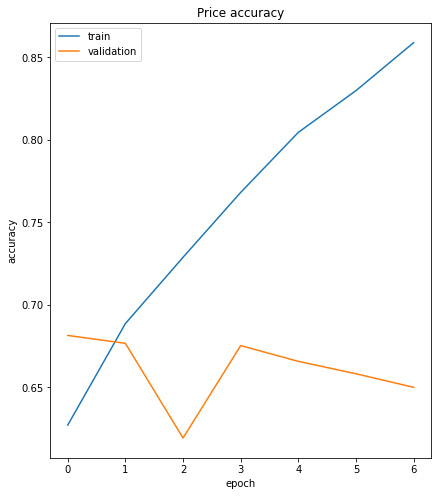

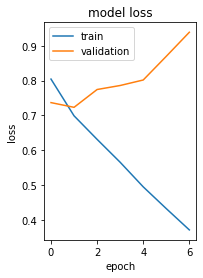

In [ ]:
# figure is used to create a new figure.
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.plot(history.history['price_sparse_categorical_accuracy'])
plt.plot(history.history['val_price_sparse_categorical_accuracy'])
plt.title('Price accuracy') # graph title
plt.ylabel('accuracy') # y axis lable
plt.xlabel('epoch') # x axis lable
plt.legend(['train', 'validation'], loc='upper left') # legend is an area describing the elements of the graph
plt.show()
plt.grid(True) # grid is the axis object's method toggles the visibility of the grid inside the figure.
plt.subplot(1, 2, 1)
plt.plot(history.history['price_loss'])
plt.plot(history.history['val_price_loss'])
plt.title('model loss')  # graph title
plt.ylabel('loss') # y axis lable
plt.xlabel('epoch')# x axis lable
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
#  (if for kaggle competition and it is about genre prediction)
pd.DataFrame(
    {'id': data_ts.id,
     'price': price_category_predicted}
).to_csv('/content/drive/MyDrive/Queens_Practical/Data_Mining/compt4/submission.csv', index=False)

#### Result

Accuracy in **kaggle** =0.64836 \
In the prevois trials, there was a lot of overfitting, so in this trial I used dropout and regularizer in text to reduce this overfitting, but the overfitting is not reduced. I tried different layers and different hyperparameters but they gave me less accuracy.

# **Questions**

**Is fully-connected model a good one for sequential data? Why? How about for image data? Is it good? Why?** \
- No, as the FC model does not care about dependences between words and a word's position, it does not learn any dependences between words and their positions, and this is very important in sequential data.
- No, as an FC model, when it classifies an image, it has a large number of parameters (weights). That makes training time slow and can increase the probability of overfitting and it is not good for feature extraction.

**What is gradient vanishing and gradient explosion, and how GRU/LSTM tries to mitigate this problem?**
- Vanishing gradient occurs during backpropagation when the derivative gets very small as we go backward in each layer, so training time will be longer when weight updates are very small. This problem occurs in sigmoid and tanh activation functions as it's derivaive between 0 and 0.25 and 0-1. We can solve this problem by using the ReLU activation function, as the gradient is 0 for negative and zero inputs, and 1 for positive inputs.

- Exploding gradient This occurs during backpropagation when the derivative gets very large as we go backward through each layer, and it is the opposite of gradient vanishing. This problem occurs when weights have large values, so the derivative will also be high, which makes the new weights different from the old weights. The gradient will never converge, so it may cause the system to oscillate about minima, never achieving a global minima point.    

- LSTM/GRU solve this problem by using internal mechanisms called gates that control information flow. The information that required for short-term learning it is forgotted but the information that required for long-term learning is kept it. 

**What is multi-objective/multi-task learning? What is multi-modality learning? How do you use them in this assignment?**
- Multi-Task Learning (MTL) is a machine learning learning paradigm whose goal is to use beneficial knowledge contained in several related tasks to improve the generalisation performance of all tasks.
 - In this problem, try to predict both price and type.
- Multi-modality learning is a predictive model that uses data from a variety of sources to create accurate predictions.
 - In this problem, try to use the text data and the image data together to get the required outcome.


 **What is the difference among xgboost, lightgbm and catboost**
 - **Catboost** 
   - Based on Minimal Variance Sampling (MVS) is a weighted sampling form of Stochastic Gradient Boosting
   - Symmetric every step uses the same criteria to divide leaves from the previous tree.
   - Ordered boosting due to an issue known as prediction shift, traditional boosting techniques are prone to overfitting on small/noisy datasets.
   - Native feature suppor t saves time and effort by supporting all types of features, whether numeric, category, or text.

 - **Lightgbm** 
  - It is a tree grow leaf-wise
  - Gradient-based one-side sampling (GOSS)
  - Increased training efficiency and speed.
  - It is depend on Decision Tree algorithm and use two techniqes Gradient-based One Side Sampling and Exclusive Feature Bundling (EFB)  
  - Memory usage is reduced.
  - Communication Costs for Parallel Learning are Reduced
  - Cost reduction while calculating gain for each decision tree split.
  - Better accuracy.
  - Parallel, distributed, and GPU learning are all supported.
  - Capable of dealing with massive amounts of data.


 - **Xgboost**
  -  It is a trees grow depth-wise
  - It does not use weighted sampling approaches, its splitting process is slower than GOSS and MVS.
  - Need a lot of resources to train on large amounts of data
  - It is a faster algorithm as its parallel and distributed computing. 
  - Distributed Computing to train large datasets
  - Out-of-core computing is used for exceedingly huge datasets that don't fit in memory.
  - Data structures and algorithms are cached to make the most of hardware.
